<a href="https://colab.research.google.com/github/TVsony/Data/blob/main/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()


In [4]:
y_test.shape

(10000,)

In [5]:
X_test.shape

(10000, 28, 28)

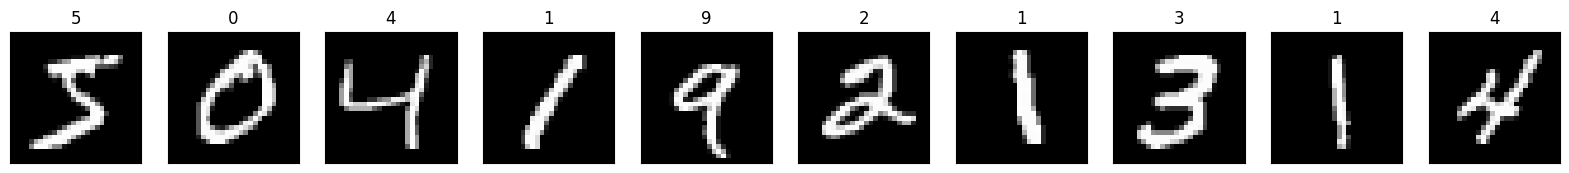

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))  # Fixed typo in 'figsize'

for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')  # Changed 'cmap' to 'gray'
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

plt.show()


In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [9]:
y_train.shape

(60000, 10)

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


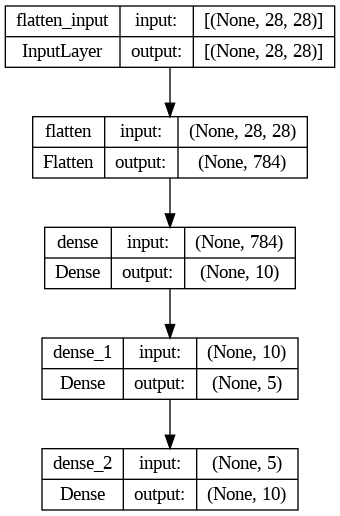

In [12]:
utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [14]:
model.fit(X_train, y_train, epochs=20,
          validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.7895 - acc: 0.4157 - val_loss: 1.4229 - val_acc: 0.5695
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2167 - acc: 0.6366 - val_loss: 1.0333 - val_acc: 0.7190
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9800 - acc: 0.7150 - val_loss: 0.9080 - val_acc: 0.7493
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8779 - acc: 0.7434 - val_loss: 0.8638 - val_acc: 0.7231
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8124 - acc: 0.7612 - val_loss: 0.7639 - val_acc: 0.7700
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7596 - acc: 0.7777 - val_loss: 0.7064 - val_acc: 0.7942
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7071 - acc: 0.8014 - val_loss: 0.6733 - val_acc: 0.8095
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

In [16]:
model.save('mnist_model.h5')